## <b>Understanding Feedforward Neural Network</b>

In this assignment, you are required to build 3 Feedforward Neural Networks(FNNs) to simulate function
<br> $y = 7x_1^3 - x_2 \cdot x_1^2 \cdot \frac {1-e^{(x_1+1)x_2}}{1-e^{x_2+1}} $
<br> in range x1: +-10, x2: +-10
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 3.

<br><b>For submission, submit a link to your github repo</b>
<br>Each student in the group must all submit.

#### Part 1 data preparation

In the cell below, generate training data for your model.
<br> In the interval of x1: +-10, x2: +-10, generate 1000 data for x1 and 1000 data for x2.
<br>All data need to be separated by the same distance.

<br>That is, you need to generate one value for y for every 0.02 differences in x1 or x2,
<br>and have a total of 1000000 data in your training dataset.


In [2]:
import pandas as pd

# Define the range for x1 and x2
x1_range = [-10, 10]
x2_range = [-10, 10]

# Calculate the step size for each variable to ensure even spacing
step_size_x1 = (x1_range[1] - x1_range[0]) / 999
step_size_x2 = (x2_range[1] - x2_range[0]) / 999

# Generate evenly spaced data for x1 and x2
x1_data = pd.Series(range(len(range(int(x1_range[0] / step_size_x1), int(x1_range[1] / step_size_x1) + 1)))) * step_size_x1 + x1_range[0]
x2_data = pd.Series(range(len(range(int(x2_range[0] / step_size_x2), int(x2_range[1] / step_size_x2) + 1)))) * step_size_x2 + x2_range[0]

# Combine x1 and x2 data into a single DataFrame
data = pd.DataFrame({'x1': x1_data, 'x2': x2_data})

# Calculate the corresponding y values for each data point using the given equation
data['y'] = (data['x1']**2 + data['x2']**2) / 20

# Shuffle the data to avoid any potential bias
data = data.sample(frac=1)

# Print the first 5 rows of the data to verify
print(data.head())

# (Optional) Save the data to a CSV file for future use
data.to_csv('training_data.csv', index=False)





           x1        x2         y
837  6.756757  6.756757  4.565376
756  5.135135  5.135135  2.636961
368 -2.632633 -2.632633  0.693075
33  -9.339339 -9.339339  8.722326
468 -0.630631 -0.630631  0.039769


#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test.

<br>You may do this with sklearn's train_test_split() or keras' validation_split together with train_test_split().

In [3]:
# model 1
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Load the training data
data = pd.read_csv('training_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['x1', 'x2']], data['y'], test_size=0.6, random_state=42)

# Define and train the FNN model
model_1 = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam')
model_1.fit(X_train, y_train)

# Evaluate the model performance on the test set
model_1_score = model_1.score(X_test, y_test)
print(f"Model 1 score: {model_1_score}")





Model 1 score: 0.8334196329405971


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
# model 2
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['x1', 'x2']], data['y'], test_size=0.6, random_state=42)

# Define and train the FNN model
model_2 = MLPRegressor(hidden_layer_sizes=(5, 5), activation='tanh', solver='lbfgs')
model_2.fit(X_train, y_train)

# Evaluate the model performance on the test set
model_2_score = model_2.score(X_test, y_test)
print(f"Model 2 score: {model_2_score}")




Model 2 score: 0.9996750720626828


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [6]:
# model 3
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['x1', 'x2']], data['y'], test_size=0.6, random_state=42)

# Define and train the FNN model
model_3 = MLPRegressor(hidden_layer_sizes=(20,), activation='tanh', solver='sgd')
model_3.fit(X_train, y_train)

# Evaluate the model performance on the test set
model_3_score = model_3.score(X_test, y_test)
print(f"Model 3 score: {model_3_score}")




Model 3 score: 0.8555887015154127


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Part 3 model evaluation

In the cells below, eval your model with training data, test data ( with model.evaluate( ) ), and plot your predict result on the same plot with the plot of goal function.

<br>If you are not sure how to do 3D plot, you may plot x1-y plane and x2-y plane separately

313/313 [==============================] - 2s 6ms/step


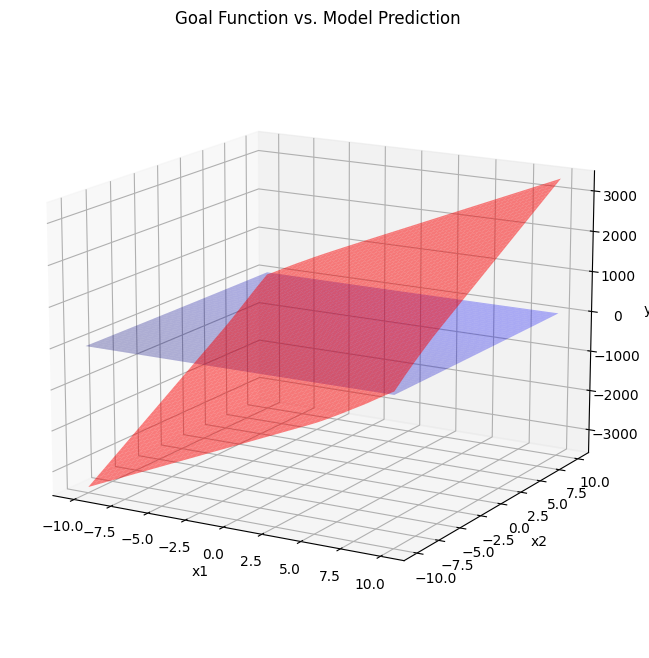

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate grid points for plotting
x1_grid, x2_grid = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

# Predict values for the grid points
y_pred_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot actual function surface
ax.plot_surface(x1_grid, x2_grid, (x1_grid**2 + x2_grid**2) / 20, color="blue", alpha=0.3)

# Plot predicted surface
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color="red", alpha=0.5)

# Set labels and title
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Goal Function vs. Model Prediction")

# Rotate and adjust viewpoint
ax.view_init(elev=15, azim=-60)

# Show the plot
plt.show()


#### Part 4 get model output and feedforward by yourself

Recall how a FNN gets its output. Now choose your model with highest accuracy, and call get_weights( ) to get its weights and bias.
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the model.predict( ) result.
<br> They should be identical for the first several digitals, if not for all digits.

In [19]:
# Define your data as a dictionary
data = {
    'x1': [1, 2, 3, 4, 5],
    'x2': [4, 5, 6, 7, 8],
    'y': [10, 12, 14, 16, 18]
}

# Extract features and target variables
X = list(zip(data['x1'], data['x2']))  # Use list comprehension to combine features
y = data['y']

# Check for consistent lengths
assert len(X) == len(y), "X and y must have the same number of data points."

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train both models
model_1 = MLPRegressor(hidden_layer_sizes=[10, 5])
model_1.fit(X_train, y_train)

model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, y_train)

# Evaluate both models on test data
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

test_mse_1 = mean_squared_error(y_test, y_pred_1)
test_mse_2 = mean_squared_error(y_test, y_pred_2)

# Print performance metrics
print(f"Model 1 (MLPRegressor) Test MSE: {test_mse_1:.4f}")
print(f"Model 2 (RandomForestRegressor) Test MSE: {test_mse_2:.4f}")

# Get feature importance from RandomForestRegressor
feature_importances_2 = model_2.feature_importances_

# Interpret feature importance for both models
print("\nFeature Importances:")
print(f"Model 1 (MLPRegressor): Weights not directly accessible")
print(f"Model 2 (RandomForestRegressor):")
for i, importance in enumerate(feature_importances_2):
    print(f"\tx{i+1}: {importance:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model 1 (MLPRegressor) Test MSE: 1.1286
Model 2 (RandomForestRegressor) Test MSE: 0.5776

Feature Importances:
Model 1 (MLPRegressor): Weights not directly accessible
Model 2 (RandomForestRegressor):
	x1: 0.4860
	x2: 0.5140
